In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math as math
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28

In [96]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [97]:
# Fitted data
xy21t1 = np.array([[0.901, 1.394],
   [1.908, 1.236],
   [2.922, 1.146],
   [3.953, 1.094],
   [4.968, 1.057],
   [6.002, 1.020],
   [8.010, 0.980]])
xy21t2 = np.array([[0.926, 1.763],
   [1.960, 1.324],
   [3.004, 1.182],
   [4.041, 1.104],
   [5.074, 1.059],
   [6.107, 1.021],
   [8.154, 0.995]])

In [98]:
Zcrit = 1e-7
def tau1(Z,m):
    return (0.225 - 0.055 * math.exp(-m**(3./2.)/4.)) * math.sqrt(-math.log10(1e-7 * Z/Zcrit)/math.log10(Z/Zcrit)/5.0 + 1.0)

def tau2(Z,m):
    return (0.335 - 0.095 * math.exp(-m**(2.)/4.)) * math.sqrt(-math.log10(1e-7 * Z/Zcrit)/math.log10(Z/Zcrit)/3.0 + 1.0)

tau1v = np.vectorize(tau1) # convert to a func that can deal with numpy vectors/arrays
tau2v = np.vectorize(tau2)

In [99]:
zrange=np.linspace(0.1,8.0,80) # See mathematica nb
zrange[0:5]

array([ 0.1,  0.2,  0.3,  0.4,  0.5])

In [116]:
y1=tau1v(10**zrange*Zcrit,2.1)/tau1v(1,2.1)
y2=tau2v(10**zrange*Zcrit,2.1)/tau2v(1,2.1)

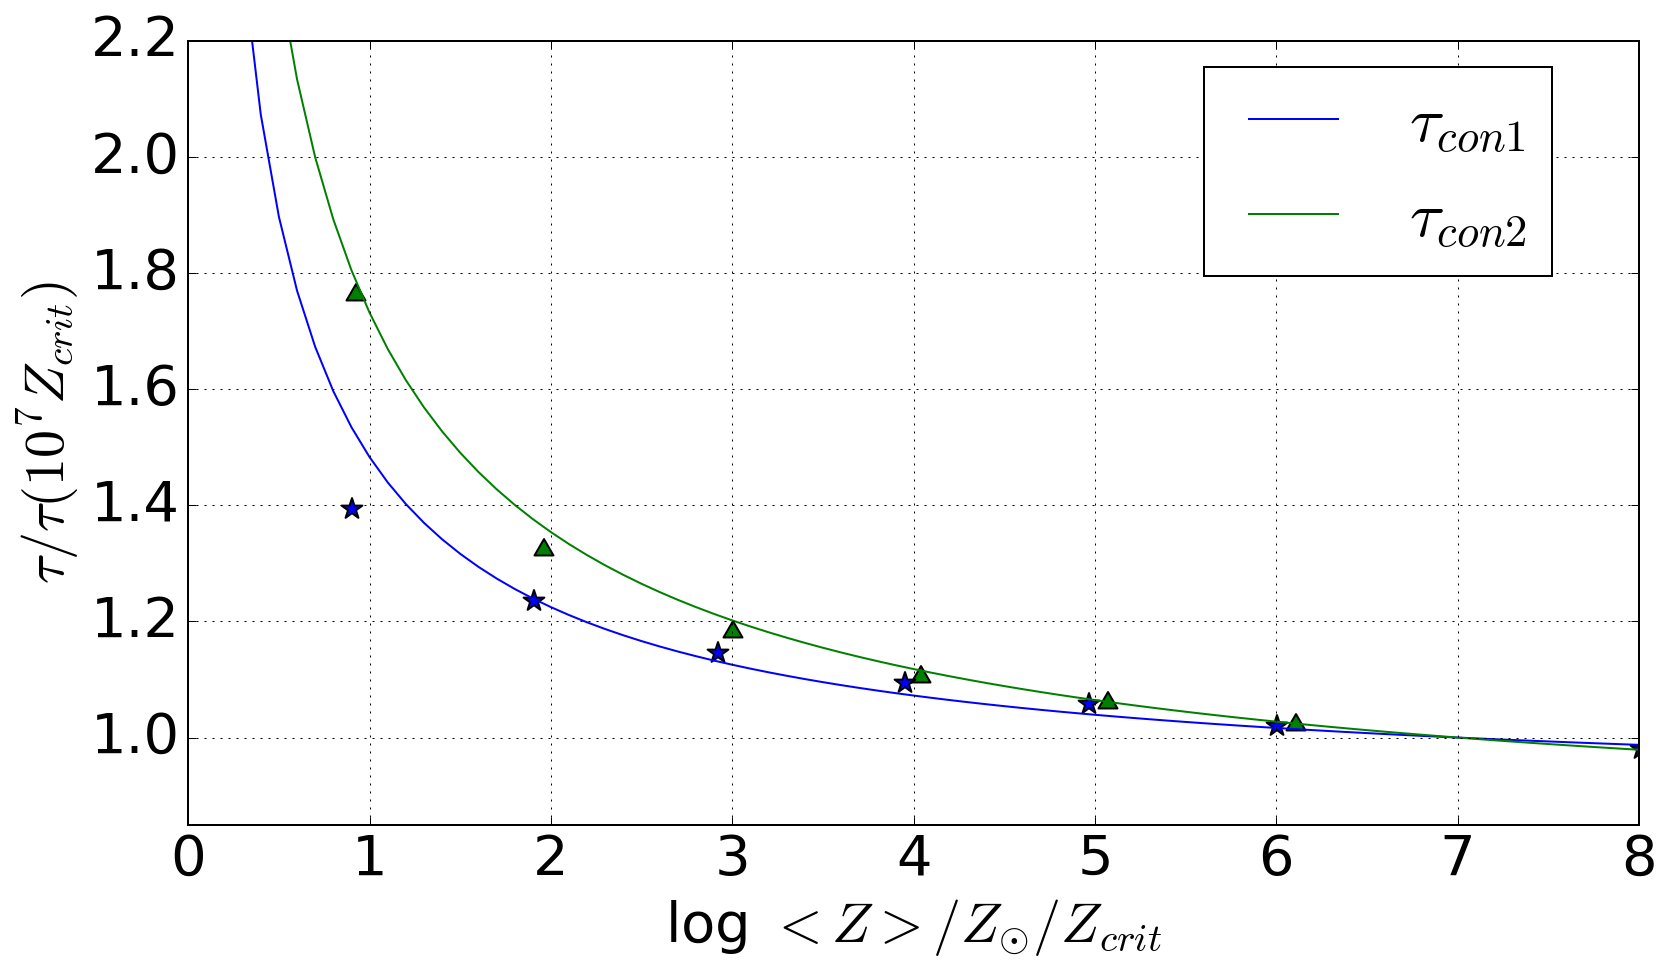

In [128]:
tauPlots = plt.axes()
tauPlots.set_aspect(3.2)
tauPlots.scatter(xy21t2[:,0],xy21t2[:,1],s=120, c="g",marker=(3,1))
tauPlots.scatter(xy21t1[:,0],xy21t1[:,1],s=120, c="b",marker='*')
tauPlots.plot(zrange,y1)
tauPlots.plot(zrange,y2)
tauPlots.grid()
tauPlots.axes.set_ylim([0.85,2.2])
tauPlots.axes.set_xlim([0.0,8.0])
tauPlots.set_xlabel("log $<Z>/Z_{\odot}/Z_{crit}$")
tauPlots.set_ylabel(r'$\tau/\tau(10^7 Z_{crit})$')
tauPlots.legend([r'$\tau_{con1}$',r'$\tau_{con2}$'],loc=(0.7,0.7), fontsize=32 )

plt.savefig("tauPlot.pdf",bbox_inches='tight')

# Cooling

In [137]:
n1 = np.array([[2.777, -25.377],
   [2.892, -24.713],
   [3.002, -24.212],
   [3.149, -23.615],
   [3.300, -23.073],
   [3.478, -22.555],
   [3.650, -22.089],
   [3.773, -21.785],
   [3.887, -21.537],
   [3.996, -21.340],
   [4.141, -21.087],
   [4.293, -20.882],
   [4.472, -20.693],
   [4.647, -20.612]])
n100 = np.array([[2.776, -23.564],
   [2.894, -22.958],
   [2.993, -22.460],
   [3.142, -21.830],
   [3.298, -21.241],
   [3.471, -20.662],
   [3.651, -20.144],
   [3.774, -19.839],
   [3.889, -19.586],
   [3.997, -19.356],
   [4.143, -19.095],
   [4.297, -18.906],
   [4.470, -18.751],
   [4.641, -18.660]])
n1e4 = np.array([[2.777, -22.284],
   [2.888, -21.709],
   [2.991, -21.184],
   [3.144, -20.457],
   [3.298, -19.797],
   [3.481, -19.142],
   [3.651, -18.640],
   [3.780, -18.354],
   [3.893, -18.141],
   [3.999, -18.018],
   [4.141, -17.872],
   [4.293, -17.832],
   [4.469, -17.816],
   [4.645, -17.816]])
n1e8 = np.array([[2.778, -21.721],
   [2.888, -21.125],
   [2.994, -20.575],
   [3.143, -19.878],
   [3.296, -19.295],
   [3.471, -18.806],
   [3.646, -18.436],
   [3.776, -18.198],
   [3.890, -18.024],
   [3.994, -17.909],
   [4.141, -17.810],
   [4.294, -17.761],
   [4.468, -17.761],
   [4.643, -17.761]])


In [166]:
def n1fit(x):
    return (-49.5957 + 31.0852 * math.log(x) - 5.67386 * math.log(x)**2 - 1.47381 * math.log(x)**3)
n1fitv=np.vectorize(n1fit)

def n100fit(x):
    return (-34.8118 - 1.61615 * math.log(x) + 21.2644 * math.log(x)**2 - 8.69699 * math.log(x)**3)
n100fitv=np.vectorize(n100fit)

def n1e4fit(x):
    return (-24.3222 - 31.2618 * math.log(x) + 51.2746 * math.log(x)**2 - 18.3506 * math.log(x)**3)
n1e4fitv=np.vectorize(n1e4fit)

def n1e8fit(x):
    return (-60.6165 + 59.4566 * math.log(x) - 21.7646 * math.log(x)**2 + 0.789041 * math.log(x)**3)
n1e8fitv=np.vectorize(n1e8fit)


In [167]:
xrange=np.linspace(2.5,5.0,10)

In [168]:
n1fitv([2,3,4]),n100fitv([2,3,4])

(array([-31.26591946, -24.24740303, -21.33307557]),
 array([-28.61179681, -22.45421555, -19.3565759 ]))

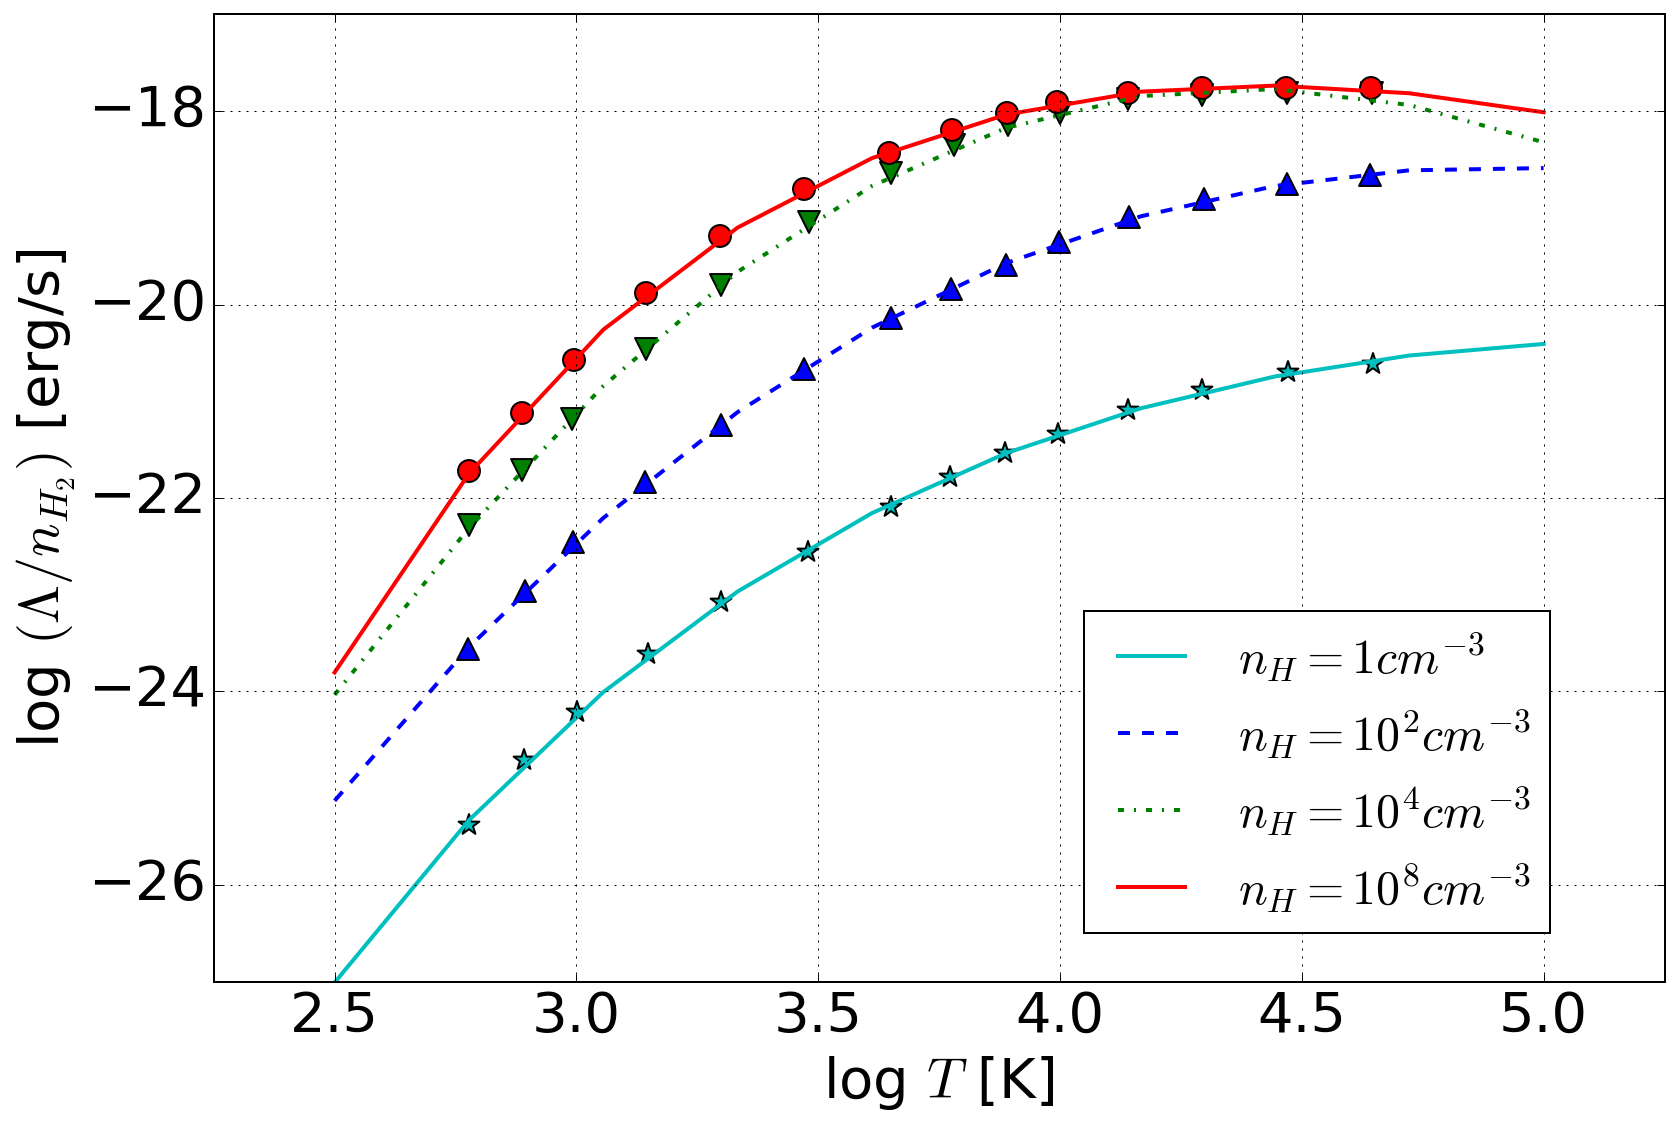

In [183]:
cool = plt.axes()
cool.set_aspect(0.2)
cool.plot(xrange, n1fitv(xrange), c="c", ls='-', lw=2)
cool.plot(xrange, n100fitv(xrange), c="b", ls='--', lw=2)
cool.plot(xrange, n1e4fitv(xrange), c="g",ls='-.', lw=2)
cool.plot(xrange, n1e8fitv(xrange), c="r",ls='-', lw=2)

cool.scatter(n1[:,0],n1[:,1],s=120, c="c",marker='*')
cool.scatter(n100[:,0],n100[:,1],s=120, c="b",marker='^')
cool.scatter(n1e4[:,0],n1e4[:,1],s=120, c="g",marker='v')
cool.scatter(n1e8[:,0],n1e8[:,1],s=120, c="r",marker='o')

cool.grid()
cool.axes.set_ylim([-27,-17])
cool.axes.set_xlim([2.25,5.25])
cool.set_xlabel("log $T$ [K]")
cool.set_ylabel(r'log $(\Lambda/n_{H_{2}})$ [erg/s]')
cool.legend([r'$n_{H} = 1 cm^{-3}$',
             r'$n_{H} = 10^{2} cm^{-3}$',
             r'$n_{H} = 10^{4} cm^{-3}$',
             r'$n_{H} = 10^{8} cm^{-3}$'],loc=(0.6,0.05), fontsize=24 )

plt.savefig("cooling.pdf",bbox_inches='tight')